# <p style = 'text-align: center;'> Atmospheric Temperature


## Introduction:

The earth's atmosphere is divided into layers, including the troposphere, the stratosphere, the mesosphere, and the thermosphere, as shown in the figure below. These layers are characterized by how temperature changes with height. In the lowest layer, the tropopause, temperature typically decreases with height. At the tropopause, temperature stops decreasing and begins to increase with height as we enter the stratosphere. The change in temperature with height has important consequences. A decrease in temperature with height results in the ability of air to move freely and mix vertically. The lower layer, the troposphere, is typically characterized by free movement of air, and is where most of Earth's weather occurs. In the stratosphere, by contrast, the decrease in temperature with height inhibits vertical movement of air, causing stratification.

<p style ='text-align: center;'>
<img src="https://s-media-cache-ak0.pinimg.com/originals/4d/6f/39/4d6f39f8847be62d4543253a0f27c607.jpg" height="400" width="400"/>  
<strong>Figure 1</strong>. Temperature profile of the earth's atmosphere along with a diagram of earth's atmospheric layers. From https://s-media-cache-ak0.pinimg.com/originals/4d/6f/39/4d6f39f8847be62d4543253a0f27c607.jpg.
</p>

Here we will focus mainly on the tropososphere. Trópos, from ancient Greek, means to turn or change. A nice description of the troposphere is given by NASA (http://www.ces.fau.edu/nasa/module-2/atmosphere/earth.php) reproduced in part in italics below:

*The troposphere makes up approximately 75% of the total mass of the atmosphere and contains 99% of the atmosphere’s water. The troposphere extends up to approximately 11 kilometers (7 miles) from the surface and is the layer where atmospheric gases are most concentrated. Nearly all weather happens in the troposphere, and the jet stream — a narrow, fast-moving “river” of wind — flows at the upper edge of this layer of the atmosphere.*

*Air temperature in the troposphere typically decreases as altitude increases as a result of three mechanisms of heat transfer (radiation, conduction, and convection). Solar radiation passes through Earth’s atmosphere and heats up the planet’s surface. The oceans and land absorb approximately half of this incoming solar radiation. The heat absorbed by Earth’s surface is then transferred directly from the land (or the water) to the cooler air closest to the surface through conduction (the direct spread of heat from one substance to another). Once heated, this air becomes less dense (or lighter) and rises through a process called convection. As the air rises, it expands and discharges its heat as it flows upward through the troposphere. After the heat is discharged and the air cools, it becomes denser and begins to sink. Consequently, the troposphere is generally warmest near Earth’s surface and coolest at its highest point.*

In this module we will look at radiosoundings and identify defining characteristics of the troposphere and tropopause, as well as difference from expectations based on the description above. We will examine how and why the polar tropospheric temperature structure differs from what we might see in other locations.

## Purpose: Plot multiple radiosondes

The objective is to learn about the detailed temperature structure over McMurdo, Antarctica. Specifically, we will:


### Python coding concepts

- Get a list of file names in a directory
- Looping over a list
- Plotting multiple curves on the same figure.

### Atmospheric Science concepts
- Temperature structure over McMurdo, Antarctica


(Radisonde tutorial part 2, by Penny M. Rowe and Aedin Wright, Nov. 9, 2016)


In [1]:
# .. Modules we will need
import numpy as np
from matplotlib import animation
from matplotlib.animation import ArtistAnimation
import matplotlib.pyplot as plt   # For plotting
from scipy.io import netcdf       # For inputing radiosonde netcdf files
import os                         # For running "operating system" commands
import time                       # For pausing to look at plots

Once again you need to specify the directory where the radisonde files are on your computer by changing the text in quotes below.

In [2]:
# .. Directory to sonde files
#sondedirectory = "C:/Users/Edgardo/OneDrive/WORK/LAB_Radio/PENNY_WORK/RadiosondeFiles/McMurdo/"      # Directory
sondedirectory = "/Volumes/MCMURDO/Data/McMurdo/radiosondes/netcdfFiles/"    # Directory

## 1) Get a list of the files in a directory

In [3]:
# .. List the contents of the sonde directory and set that to the variable "sondefiles"
#    Print out the first few file names and print the length of the list
sondefilesAll = os.listdir(sondedirectory)

# .. Get indices to date and time for each kind of file. We will use this to get date and time strings
#    for all files and to sort the files

# .. First, figure out what the indices should be:
print(sondefilesAll[0]+ ', of length ' + str(len(sondefilesAll[0])))
print(sondefilesAll[0][0:18])

print('')
print(sondefilesAll[-1]+', of length ' + str(len(sondefilesAll[-1])))
print(sondefilesAll[-1][0:17])


# So for the two different different types of filenames we need:
filelen1 = 44; idate1 = np.arange(18,27); itime1=np.arange(27,34); 
filelen2 = 35; idate2 = np.arange(17,26); itime2=np.arange(26,33); 

# Test it
print(idate1)
print(itime1)
print(idate1)
print(sondefilesAll[0][idate1[0]:idate1[-1]] )
print(sondefilesAll[0][itime1[0]:itime1[-1]] )

print(sondefilesAll[-1][idate2[0]:idate2[-1]] )
print(sondefilesAll[-1][itime2[0]:itime2[-1]] )



awrsondewnpnM1.b1.20151130.223600.custom.cdf, of length 44
awrsondewnpnM1.b1.

ssecSondeMcMurdo.20160105.000000.nc, of length 35
ssecSondeMcMurdo.
[18 19 20 21 22 23 24 25 26]
[27 28 29 30 31 32 33]
[18 19 20 21 22 23 24 25 26]
20151130
223600
20160105
000000


In [4]:
dateStr = []
sondefiles  = []

# Now we are ready to loop over the files. Just get files for 2015 and 2016
for i in range(len(sondefilesAll)):
    if len(sondefilesAll[i])==44:
        i1 = idate1[0]; i2 = itime1[-1]
    elif len(sondefilesAll[i])==35:
        i1 = idate2[0]; i2 = itime2[-1]
    else:
        raise NameError('Unallowed file in directory; remove or modify code.')
        
    if sondefilesAll[i][i1:i1+4]=='2015' or sondefilesAll[i][i1:i1+4]=='2016':
        sondefiles.append(sondefilesAll[i] )   
        dateStr.append(sondefilesAll[i][i1:i2] )   
            
    
# Now sort it using np.argsort.
isort = np.argsort(dateStr)

# Get sorted results to use below. We have to make these numpy arrays before we can index them
dateStr = np.array(dateStr) #
sondefiles = np.array(sondefiles)
dateStr = dateStr[isort]
sondefiles = sondefiles[isort]

# So now we can loop over length isort in all our following work
for i in range(10): #len(isort)):
    print(sondefiles[i]) #isort[i]])
    print(dateStr[i]) #isort[i]])


ssecSondeMcMurdo.20150101.120000.nc
20150101.120000
ssecSondeMcMurdo.20150102.000000.nc
20150102.000000
ssecSondeMcMurdo.20150103.000000.nc
20150103.000000
ssecSondeMcMurdo.20150103.120000.nc
20150103.120000
ssecSondeMcMurdo.20150104.000000.nc
20150104.000000
ssecSondeMcMurdo.20150104.120000.nc
20150104.120000
ssecSondeMcMurdo.20150105.000000.nc
20150105.000000
ssecSondeMcMurdo.20150105.120000.nc
20150105.120000
ssecSondeMcMurdo.20150106.000000.nc
20150106.000000
ssecSondeMcMurdo.20150106.120000.nc
20150106.120000


## 2) Loop over the list and plot data from each file

//anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


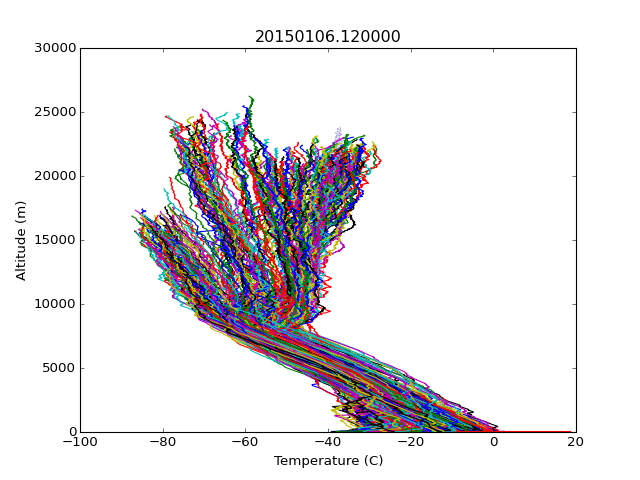

In [5]:
%matplotlib notebook 
plt.figure()
for i in range(10):                           # Change the range so you can look at all the data
    thisSonde = netcdf.netcdf_file(sondedirectory+sondefiles[i],mmap=False)   
    sondeDate = dateStr[i]                    # Get the date from the dateStr         # NOT FROM THE FILENAME!
    temp = thisSonde.variables['tdry'][:]     # This is an alternate way to get the data.
    alt = thisSonde.variables['alt'][:]
    thisSonde.close()                         # Close the netcdf file when done with it.
    plt.plot(temp,alt,'b')                    # b' for blue, 'g' for green, 'r' for red
    plt.xlabel('temperature [C]')             # Label the x-axis
    plt.ylabel('Altitude [m]')                # Label the y-axis
    plt.title(sondeDate)                      # Label the plot with the date    plt.draw()
    #time.sleep(0.1)                             # Pause 2 seconds between each plot.
    plt.plot(temp,alt,color=[.9,.9,.9])       # Keep the old plots there in light grey for comparison


## 2.1) Another way

Full Temperature Evolution Profile for 2015-2016

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-100, 10), ylim=(0, 30000))
line, = ax.plot([], [], lw=1)
plt.xlabel('Temperature [C]',fontsize=14)             # Label the x-axis
plt.ylabel('Altitude [m]',fontsize=14)                # Label the y-axis
plt.grid('on')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    thisSonde = netcdf.netcdf_file(sondedirectory+sondefiles[i],mmap=False)    
    sondeDate = dateStr[i]          # Get the date from the dateStr         # NOT FROM THE FILENAME!
    alt  = thisSonde.variables['alt'].data[:]                                # altitude
    temp = thisSonde.variables['tdry'].data[:]                               # temperature
    line.set_data(temp, alt)
    plt.title('Atmospheric Temperature Profile. McMurdo '+sondeDate,fontsize=18) # Label the plot with the date    plt.draw()
    thisSonde.close()
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=600, interval=125, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#anim.save('my_animation.mp4')
plt.show()


Comment 3: This method show the full temperature profile evolution. But present memory problems, I think.
With the "frames" numbers we can control the last data (date) to show, and with the "interval" value is the time in [ms] per frame.

Full Relative Humidity Profile

In [ ]:
"""
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 30000))
line, = ax.plot([], [], 'r', lw=1)
plt.xlabel('Relative Humidity [%]',fontsize=14)       # Label the x-axis
plt.ylabel('Altitude [m]',fontsize=14)                # Label the y-axis
plt.grid('on')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    thisSonde = netcdf.netcdf_file(sondedirectory+sondefiles[i],mmap=False)  # Load in the netcdf file
    sondeDate = dateStr[i] 
    alt  = thisSonde.variables['alt'].data[:]                            # altitude
    rh = thisSonde.variables['rh'].data[:]                               # relative humidity
    line.set_data(rh, alt)
    plt.title('Atmospheric Relative Humidity Profile. McMurdo '+sondeDate,fontsize=18) # Label the plot with the date    plt.draw()
    thisSonde.close()
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=600, interval=125, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
"""

## 3) Plot a subset of the data.

You can also subset the data in a bunch of ways.  Following is a way to pick out all the data from the same time.

Turns out there are two radiosoundings per day, at about 2200 and 1100 (I think that is UTC, or coordinated universal time. Please look up McMurdo on Wikipedia and find the local time offset from UTC.) What if you wanted to plot only the cases near 2200?  How might you do that?  Well, the filename includes year, month, day, then a period, then hour, minute, and second. So awrsondewnpnM1.b1.20160810.224100.custom.cdf was measured on 2016/08/10 at 22:41:00 UTC. Since 24:00:00 is midnight, that's a little over an hour before midnight. We can pick off the time using the index to where the hour is in the name. That is we, count how many characters over to the hour. Try the following:

In [6]:
sondefile = sondefiles[0]  # Get the first sonde filename from the list
print(sondefile)           # Print out the whole name 
print(sondefile[27:29])    # Now print the name from the 27th to 28th character. That's the hour
                           # Now you do it but print the year, month, day, etc.

ssecSondeMcMurdo.20150101.120000.nc
20


Now we will loop over the files and pick off the hour. Then we will see if it is close to 22. Say, within 6 hours.  If so, we'll plot the temperature vs. height.

In [6]:
#plt.figure()
hours = []                          # We will keep a list of the hours we use
for i in range(0,len(sondefiles)):  # Loop over files
    sondefile = sondefiles[i]       # Get the first sonde filename from the list
    hour = dateStr[i][9:11]         # hour is a substring of sondeDate, which is YYYYMMDDhhmmss
    hour = int(hour)                # We want it to be an integer.  int converts it to an integer
    if abs(hour-22)<=3:             # Check if it is within +/- 3 hours of 22
        hours.append(hour)          # Add this hour to the list
        thisSonde = netcdf.netcdf_file(sondedirectory+sondefile,mmap=False)
        temp = thisSonde.variables['tdry'][:]
        alt = thisSonde.variables['alt'][:]
        thisSonde.close()
        plt.plot(temp,alt)
        plt.xlabel('Temperature (C)')             # Label the x-axis
        plt.ylabel('Altitude (m)')                # Label the y-axis



In [7]:
# Make sure that they really were all at 22.
print(hours)

[22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 22, 22, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 22, 22, 22, 23, 22, 23, 22, 22, 22, 22, 23, 23, 22, 22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22, 22, 22, 21, 22, 22, 21, 22, 22, 21, 22, 22, 22, 21, 22, 22, 21, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 22, 22, 21, 23, 22, 22, 23, 22, 22, 22, 22, 22, 22, 21, 21, 22, 22, 21, 22, 22, 22, 22, 22, 21, 22, 21, 22, 22, 21, 22, 22, 22, 22, 22, 22, 22, 22, 21, 22, 21, 21, 22, 22, 21, 21, 21, 22, 22,

In [9]:
len(sondefiles)

1035

In [10]:
len(hours)

266

Temperature Evolution Profile (only at 22 hrs.)

In [ ]:
"""
fig = plt.figure()
ax = plt.axes(xlim=(-100, 10), ylim=(0, 30000))
line, = ax.plot([], [], lw=1)
plt.xlabel('Temperature [C]',fontsize=14)             # Label the x-axis
plt.ylabel('Altitude [m]',fontsize=14)                # Label the y-axis
plt.grid('on')

def init():
    line.set_data([], [])
    return line,

hours = []                              # We will keep a list of the hours we use
def animate(i):                         
    #for i in range(0,len(sondefiles)):  # Loop over files
        sondefile = sondefiles[i]       # Get the first sonde filename from the list
        hour = dateStr[i][9:11]         # hour is a string
        hour = int(hour)                # We want it to be an integer.  int converts it to an integer
        if abs(hour-22)<=1:             # Check if it is within +/- 3 hours of 22
            hours.append(hour)          # Add this hour to the list
            thisSonde = netcdf.netcdf_file(sondedirectory+sondefiles[i],mmap=False)  # Load in the netcdf file
            sondeDate = dateStr[i] 
            alt  = thisSonde.variables['alt'].data[:]                                # altitude
            temp = thisSonde.variables['tdry'].data[:]                               # temperature
            plt.title('Atmospheric Temperature Profile. McMurdo '+sondeDate,fontsize=18)
            line.set_data(temp, alt)
            thisSonde.close()
            return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=600, interval=62.5, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
"""

Comment 4: The problem here is that the frame stay in the count of process, so the time of the all process is the same if i take all the data, and no only the selected.

Relative Humidity Evolution Profile (only at 22 hrs.)

In [ ]:
"""
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 30000))
line, = ax.plot([], [], 'r', lw=1)
plt.xlabel('Relative Humidity [%]',fontsize=14)             # Label the x-axis
plt.ylabel('Altitude [m]',fontsize=14)                      # Label the y-axis
plt.grid('on')

def init():
    line.set_data([], [])
    return line,

hours = []                              # We will keep a list of the hours we use
def animate(i):                         
    #for i in range(0,len(sondefiles)): # Loop over files
        sondefile = sondefiles[i]       # Get the first sonde filename from the list
        hour = dateStr[i][9:11]         # hour is a string
        hour = int(hour)                # We want it to be an integer.  int converts it to an integer
        if abs(hour-22)<=1:             # Check if it is within +/- 3 hours of 22
            hours.append(hour)          # Add this hour to the list
            thisSonde = netcdf.netcdf_file(sondedirectory+sondefiles[i],mmap=False)  # Load in the netcdf file
            sondeDate = dateStr[i] 
            alt  = thisSonde.variables['alt'].data[:]                                # altitude
            rh = thisSonde.variables['rh'].data[:]                                   # relative humidity
            plt.title('Atmospheric Relative Humidity Profile. McMurdo '+sondeDate,fontsize=18)
            line.set_data(rh, alt)
            thisSonde.close()
            return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=600, interval=62.5, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
"""

# Make a code that select the days that reach a RH over 90%

In [11]:
print(len(sondefiles))
print(sondefiles[533:535])

1035
['awrsondewnpnM1.b1.20151224.102100.custom.cdf'
 'ssecSondeMcMurdo.20151224.120000.nc']


In [12]:
hours = []
sel=[]
m=0
thisrh  = np.zeros((1,10))
thisalt  = np.zeros((1,10))
rh2 = np.zeros((len(sondefiles),10))
alt2 = np.zeros((len(sondefiles),10))
rhAll= np.nan*np.ones((len(sondefiles),10000))
altAll = np.nan*np.ones((len(sondefiles),10000))
maxSondePts = 0
  
for i in range(0,len(sondefiles)):  # Loop over files  #len(sondefiles)
    sondefile = sondefiles[i]       # Get the first sonde filename from the list
    hour = dateStr[i][9:11]       # hour is a string
    hour = int(hour)                # We want it to be an integer.  int converts it to an integer
    if abs(hour-22)<=3:             # Check if it is within +/- 3 hours of 22
        hours.append(hour)          # Add this hour to the list
        thisSonde = netcdf.netcdf_file(sondedirectory+sondefiles[i],mmap=False)  # Load in the netcdf file
        sondeDate = dateStr[i] 
        alt = thisSonde.variables['alt'].data[:]                                 # altitude
        rh = thisSonde.variables['rh'].data[:]                                   # relative humidity
        thisSonde.close()
        k=0
        for j in range(0,len(rh)):
            if rh[j] > 90:
                while k<=9:
                    thisrh[0,k] = rh[j]
                    thisalt[0,k]= alt[j]
                    if k==9:
                        sel.append(sondeDate)
                        rh2[m,:]=thisrh
                        alt2[m,:]=thisalt
                        m=m+1
                        rhAll[m,:len(rh)]   = rh
                        altAll[m,:len(alt)] = alt
                        maxSondePts = max(maxSondePts,len(rh))
                    k=k+1
                
rh3 = rh2[0:m,:]
alt3 = alt2[0:m,:]
rhAll = rhAll[0:m,0:maxSondePts]
altAll = altAll[0:m,0:maxSondePts]

In [13]:
print(rh3.shape)
print(alt3.shape)
print(len(sel))
print(np.nan)

(206, 10)
(206, 10)
206
nan


<IPython.core.display.Javascript object>


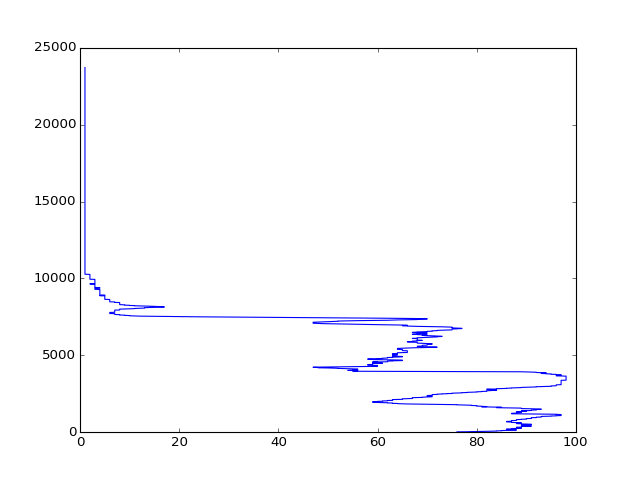

In [14]:
fig = plt.figure()
plt.plot(rhAll[1,:],altAll[1,:])

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 10000))
line, = ax.plot([], [], 'r', lw=1)
plt.xlabel('Relative Humidity [%]',fontsize=14)             # Label the x-axis
plt.ylabel('Altitude [m]',fontsize=14)                      # Label the y-axis
plt.grid('on')

def init():
    line.set_data([], [])
    return line,

def animate(k):
    plt.title('Atmospheric Relative Humidity Profile. McMurdo '+sel[k],fontsize=18)
    #plt.title('Atmospheric Relative Humidity Profile. McMurdo '+sondeDate,fontsize=18)
    #line.set_data(rh3[k,:], alt3[k,:])
    line.set_data(rhAll[k,:], altAll[k,:])
    return line,
    
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=600, interval=62.5, blit=True)

plt.show()

In [ ]:
print(sel)
len(sel)

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 30000))
line, = ax.plot([], [], 'r', lw=1)
plt.xlabel('Relative Humidity [%]',fontsize=14)             # Label the x-axis
plt.ylabel('Altitude [m]',fontsize=14)                      # Label the y-axis
plt.grid('on')

def init():
    line.set_data([], [])
    return line,

def animate(k):
    plt.title('Atmospheric Relative Humidity Profile. McMurdo '+sel[k],fontsize=18)
    line.set_data(rhfull[lend[k]:lend[k+1]], alt[lend[k]:lend[k+1]])
    return line,
        
        
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=62.5, blit=True)

plt.show()

In [ ]:
sonde

In [ ]:
len(lend)

In [ ]:
lend[45:50]